In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('college-data.csv')
df['founded_in'] = df['founded_in'].astype(int, errors='ignore')
df['founded_in'] = pd.to_datetime(df['founded_in'], format='%Y')
df['for_profit'] = df['for_profit'].astype(int)
# df['closed_merged_in'] = df['closed_merged_in'].astype(int, errors='ignore')
# df['closed_merged_in'] = pd.to_datetime(df['closed_merged_in'], format='%Y')

df.dtypes
# df['for_profit'] = df['for_profit'].astype(bool)
# df['religious_controlled'] = df['religious_controlled'].astype(bool)
# df.head(25)

name                            object
state                           object
location                        object
control                         object
for_profit                       int64
religious_controlled             int64
religious_orentation            object
degree_type                     object
focus                           object
founded_in              datetime64[ns]
closed_merged_in                object
done                            object
closed_reason                   object
enrollment                      object
historically_black              object
accreditation                   object
dtype: object

In [3]:
degree_types = ["Doctoral University", "Baccalaureate College", "Liberal Arts", "Masters University"]
degree_filter = df['degree_type'].isin(degree_types)

colleges = df[degree_filter]
# colleges.head(50)

In [4]:
# private_colleges = colleges[colleges['control'] == "Private"]
# private_colleges.head(25)
# non_profit_colleges = private_colleges[private_colleges['for_profit'] == 0]
# non_profit_colleges.head(25)
# secular_non_profit_colleges = non_profit_colleges[non_profit_colleges['religious_controlled'] == 0] 

secular_non_profit_colleges = colleges[
    (colleges['control'] == "Private") &
    (colleges['for_profit'] == 0) &
    (colleges['religious_controlled'] == 0) 
]

secular_non_profit_colleges.head(5)
# secular_non_profit_colleges.dtypes

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS


In [5]:
# Cast new dataframe with null values expunged for `founded_in` feature
try:
    snp_colleges_non_null = secular_non_profit_colleges.copy()
    snp_colleges_non_null["founded_in"].dropna(inplace=True)
    ARG_NON_NULL_FOUNDRY = snp_colleges_non_null["founded_in"].notnull()
    snp_colleges_non_null = snp_colleges_non_null[ARG_NON_NULL_FOUNDRY]
except:
    print("`Founded_In` null values are already dropped.")
    
snp_colleges_non_null.head()

,name,state,location,control,for_profit,religious_controlled,religious_orentation,degree_type,focus,founded_in,closed_merged_in,done,closed_reason,enrollment,historically_black,accreditation
1,Yale University,Connecticut,New Haven,Private,0,0,Christian,Doctoral University,NaN,1701-01-01,NaN,AJB,NaN,"12,458",NaN,NaN
2,University of Pennsylvania,Pennsylvania,Philadelphia,Private,0,0,Christian,Baccalaureate College,NaN,1740-01-01,NaN,AJB,NaN,"25,007",NaN,NaN
3,Moravian College,Pennsylvania,Bethlehem(Northampton County),Private,0,0,Moravian,Baccalaureate College,NaN,1742-01-01,NaN,AJB,NaN,"2,032",NaN,NaN
4,Princeton University,New Jersey,Princeton,Private,0,0,Christian,Doctoral University,NaN,1746-01-01,NaN,AJB,NaN,"8,010",NaN,MSCHE
5,Washington and Lee University,Virginia,Lexington,Private,0,0,Christian,Baccalaureate College,NaN,1749-01-01,NaN,AJB,NaN,"2,223",NaN,SACS


In [6]:
snp_colleges_nn_time_series = (
        snp_colleges_non_null["founded_in"].value_counts()
        .rename_axis("Year")
        .reset_index(name="Count")
)

# Get Count Sums Per Decade
snp_colleges_nn_time_series = (
        snp_colleges_nn_time_series.groupby((snp_colleges_nn_time_series["Year"].dt.year // 10) * 10)
        .sum()
        .reset_index()
)

snp_colleges_nn_time_series

,Year,Count
0,1700,1
1,1740,4
2,1750,1
3,1760,2
4,1770,3
5,1780,7
6,1790,4
7,1800,2
8,1810,2
9,1820,9


In [36]:
MIN_YEAR, MAX_YEAR = 1690, 2030

[]

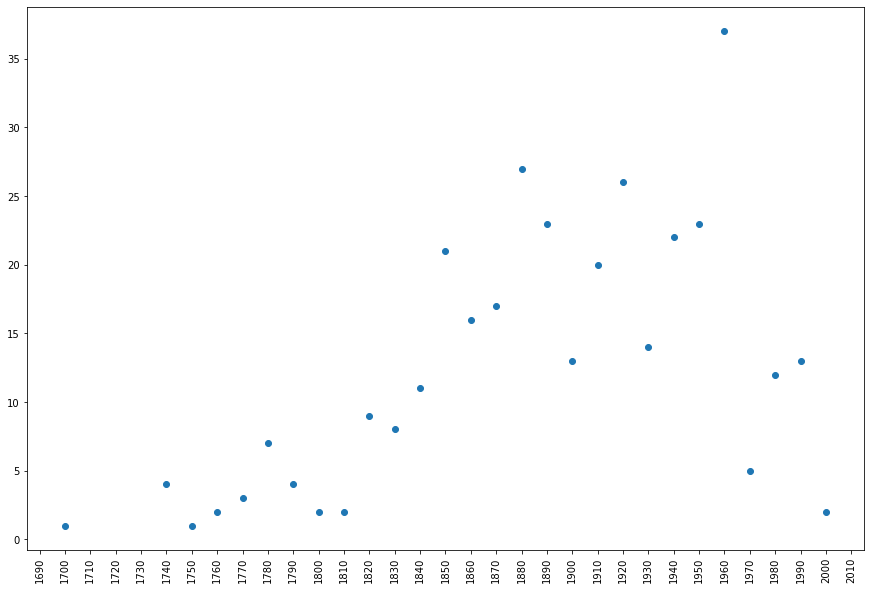

In [80]:
# Scatterplot
plt.figure(figsize=(15, 10))
plt.scatter(x=snp_colleges_nn_time_series["Year"],
            y=snp_colleges_nn_time_series["Count"])

plt.xticks(np.arange(MIN_YEAR, MAX_YEAR, step=10), rotation=90)
plt.plot()

[]

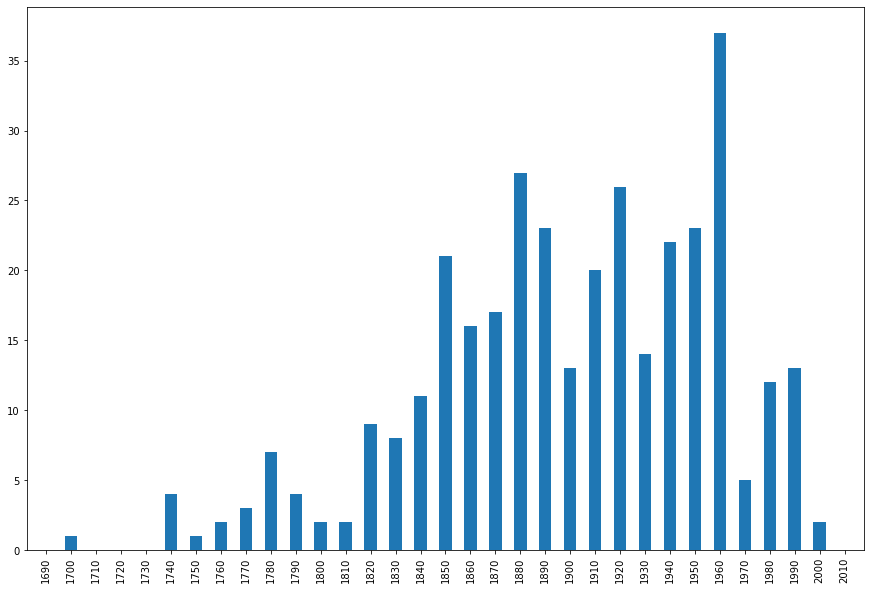

In [82]:
# Barplot
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(MIN_YEAR, MAX_YEAR, step=10), rotation=90)
plt.bar(x=snp_colleges_nn_time_series["Year"],
        height=snp_colleges_nn_time_series["Count"],
        width=5.)
plt.plot()

In [19]:
secular_non_profit_colleges["founded_in"].dt.year

1       1701.0
2       1740.0
3       1742.0
4       1746.0
5       1749.0
         ...  
2933    2008.0
2942    2009.0
2975       NaN
2976       NaN
2977       NaN
Name: founded_in, Length: 348, dtype: float64

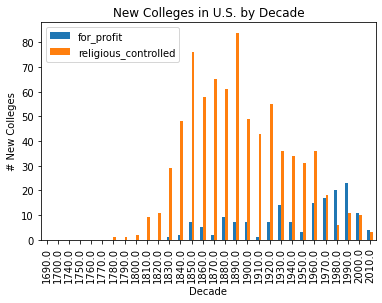

In [6]:
# Line chart of colleges founded by year
colleges_decades = colleges.groupby((colleges.founded_in.dt.year//10)*10).sum()
# print(decades)
colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

            for_profit  religious_controlled
founded_in                                  
1700.0               0                     0
1740.0               0                     0
1750.0               0                     0
1760.0               0                     0
1770.0               0                     0
1780.0               0                     0
1790.0               0                     0
1800.0               0                     0
1810.0               0                     0
1820.0               0                     0
1830.0               0                     0
1840.0               0                     0
1850.0               0                     0
1860.0               0                     0
1870.0               0                     0
1880.0               0                     0
1890.0               0                     0
1900.0               0                     0
1910.0               0                     0
1920.0               0                     0
1930.0    

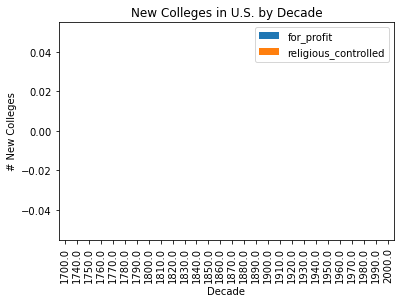

In [8]:
# Line chart of colleges founded by year
secular_non_profit_colleges_decades = secular_non_profit_colleges.groupby((secular_non_profit_colleges.founded_in.dt.year//10)*10).sum()
print(secular_non_profit_colleges_decades)
secular_non_profit_colleges_decades.plot(kind='bar');
plt.xlabel("Decade")
plt.ylabel("# New Colleges")
plt.title("New Colleges in U.S. by Decade");

### Below are the plots I'm working on,  haven't changed anything above //Johanna
1. All colleges founded by decade bar chart
2. Nonprofit, secular, bachelor’s degree granting colleges founded by decade bar chart
3. Comparison for profit, non profit colleges founded by decade.
4. Comparison religiously controlled, secular colleges founded by decade.

Including also year-by-year from 1950 for all of these

#### First, some processing and general setups 
Colleges with NaT in founded_in column: 
- Mount Liberty College (2019?)
- New U Univeresity (2019?) 
- University of Beverly Hills ("defunct")
- San Ignacio University (Doral) (don't find)
- Valley Forge Christian College (1939?)
- Washington Baptist University (1982?)

In [ ]:
# 6 colleges have NaT in founded_in column, remove these...
colleges = colleges[~colleges["founded_in"].isnull()]

In [5]:
# ... or, add years found on internet
from datetime import datetime
college_year = [("Mount Liberty College", "2019"),             # https://www.liberalartscolleges.com/schools/mount-liberty-college/
                ("New U Univeresity", "2019"),                 # https://newu.university/about/
                ("Valley Forge Christian College", "1939"),    # https://valleyforge.edu/about/history/
                ("Washington Baptist University", "1982")]     # http://www.englisheducationguide.com/united_states/1871.htm
for college, year in college_year:
    colleges.loc[colleges["name"] == college, "founded_in"] = datetime.strptime(year, '%Y')
colleges = colleges[~colleges["founded_in"].isnull()]  # remove the remaining 2

In [6]:
# Make "decade" column and some checks
colleges["decade"] = (np.floor(colleges["founded_in"].dt.year / 10) * 10 + 10).astype(int)
min_decade = np.min(colleges["decade"].unique())
max_decade = np.max(colleges["decade"].unique())
print(f"Decade span: {min_decade} - {max_decade}")
print(f"Number of colleges: {len(colleges)}")
# colleges.head(5)

Decade span: 1700 - 2020
Number of colleges: 1815


In [7]:
# Colleges founded after 1950
colleges["year"] = colleges["founded_in"].dt.year.astype(int)
colleges_after_1950 = colleges[colleges["year"] >= 1950]
min_year = np.min(colleges_after_1950["year"].unique())
max_year = np.max(colleges_after_1950["year"].unique())
print(f"Year span: {min_year} - {max_year}")
print(f"Number of colleges: {len(colleges_after_1950)}")
# colleges_after_1950.tail(5)

Year span: 1950 - 2019
Number of colleges: 423


In [8]:
# Plotting setups
fig_size = (15, 10)
decade_range = np.arange(min_decade, max_decade + 10, step=10)
year_range = np.arange(min_year, max_year + 2, step=5)  # +2 to include 2020 along x in the plots (+1 would been go to otherwise, to get max 2019 which is the last year with data)
bin_range_decade = (min_decade - 5, max_decade + 5)
bin_range_year = (min_year - 0.5, max_year + 0.5)
sns.set_palette("dark")
sns.set_theme(style="whitegrid")

plt.rc('font', size=14)    
plt.rc('axes', titlesize=14)  
plt.rc('axes', labelsize=12)  
plt.rc('xtick', labelsize=10)  
plt.rc('ytick', labelsize=10)  
plt.rc('legend', fontsize=10)   
plt.rc('figure', titlesize=14)  

### 1, All colleges

#### Founded by decade

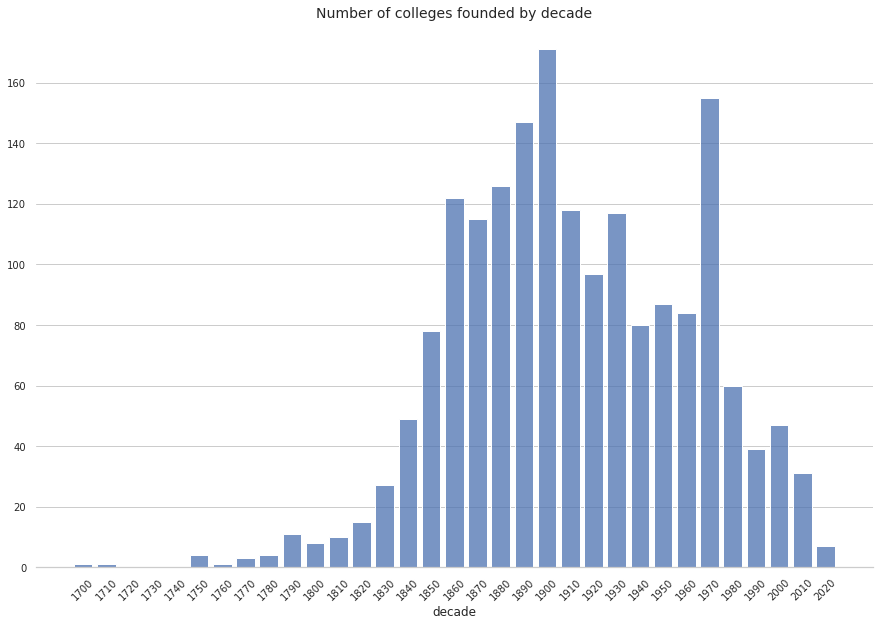

In [9]:
plt.figure(figsize=fig_size)
sns.histplot(data=colleges, x="decade", binwidth=10, binrange=bin_range_decade, edgecolor = 'w', shrink=0.8)

plt.xticks(decade_range, rotation=45)
plt.ylabel('')
plt.title("Number of colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_1_decades.png", facecolor='white')  # ignore facecolor for a transparent background

#### Founded by year from 1950

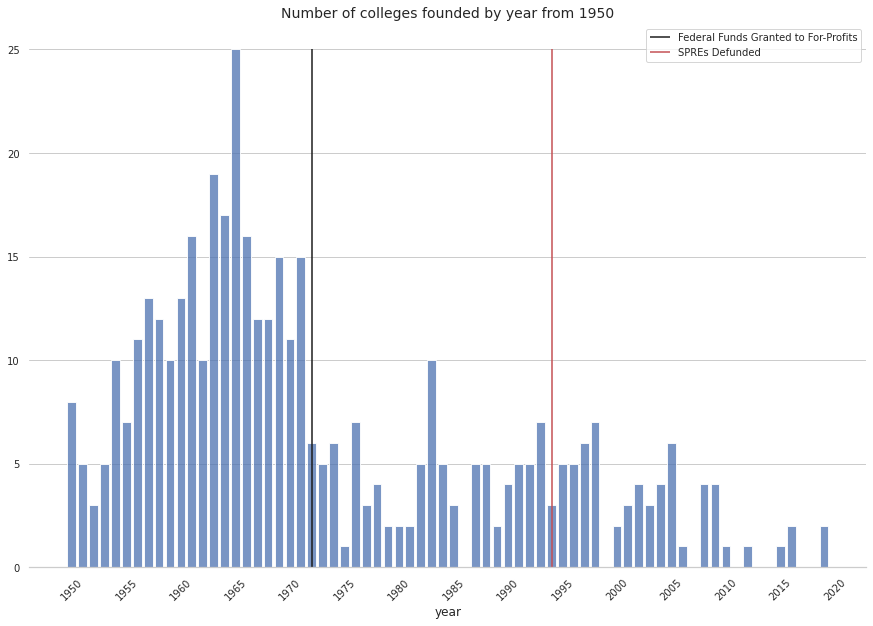

In [10]:
plt.figure(figsize=fig_size)
sns.histplot(data=colleges_after_1950, x="year", binwidth=1, binrange=bin_range_year, edgecolor = 'w', shrink=0.8)

plt.xticks(year_range, rotation=45)
plt.ylabel('')
plt.title("Number of colleges founded by year from 1950")
sns.despine(left=True)
plt.grid(axis='x')
plt.vlines(x=1972, ymin=0, ymax=25, colors='k', label='Federal Funds Granted to For-Profits')
plt.vlines(x=1994, ymin=0, ymax=25, colors='r', label='SPREs Defunded')
plt.legend();
# plt.savefig("plots/plot_1_years.png", facecolor='white')  # ignore facecolor for a transparent background

### 2, Nonprofit, secular, bachelor’s degree granting colleges

In [11]:
# Same as given code above
secular_non_profit_colleges = colleges[
    (colleges['control'] == "Private") &
    (colleges['for_profit'] == 0) &
    (colleges['religious_controlled'] == 0) 
]
secular_non_profit_colleges_after_1950 = secular_non_profit_colleges[secular_non_profit_colleges["year"] >= 1950]
print(f"Number of non profit, secular colleges: {len(secular_non_profit_colleges)}")
print(f"Number founded after 1950: {len(secular_non_profit_colleges_after_1950)}")
# secular_non_profit_colleges.head(5)

Number of non profit, secular colleges: 347
Number founded after 1950: 94


#### Founded by decade

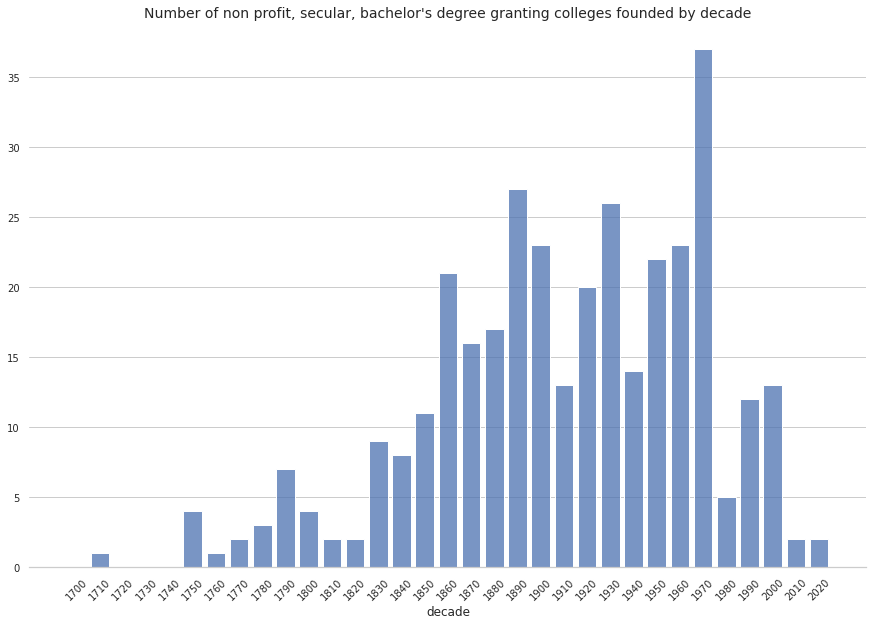

In [12]:
plt.figure(figsize=fig_size)
sns.histplot(data=secular_non_profit_colleges, x="decade", binwidth=10, binrange=bin_range_decade, edgecolor = 'w', shrink=0.8)

plt.xticks(decade_range, rotation=45)
plt.ylabel('')
plt.title("Number of non profit, secular, bachelor's degree granting colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_2_decades.png", facecolor='white')  # ignore facecolor for a transparent background

#### Founded by year from 1950

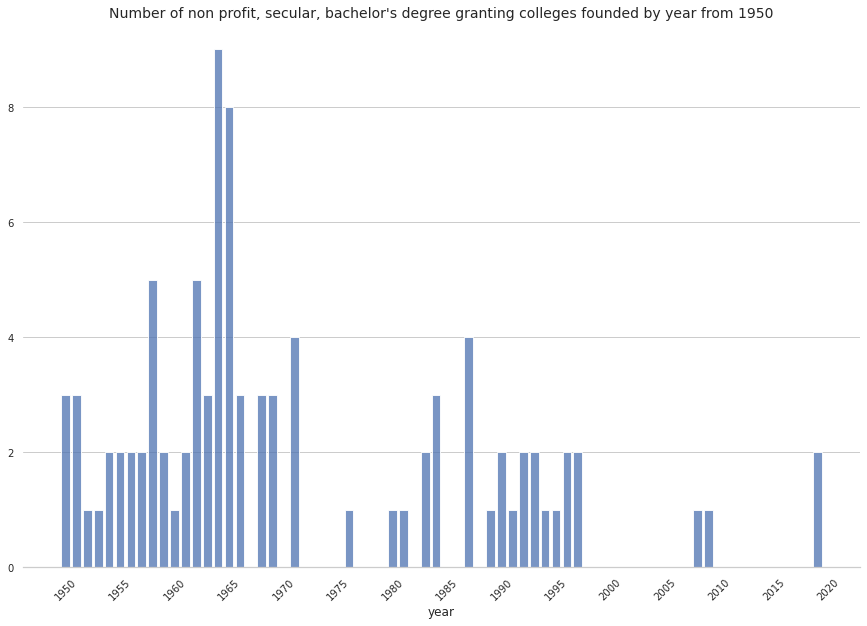

In [13]:
plt.figure(figsize=fig_size)
sns.histplot(data=secular_non_profit_colleges_after_1950, x="year", binwidth=1, binrange=bin_range_year, edgecolor = 'w', shrink=0.8)

plt.xticks(year_range, rotation=45)
plt.ylabel('')
plt.title("Number of non profit, secular, bachelor's degree granting colleges founded by year from 1950")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_2_years.png", facecolor='white')  # ignore facecolor for a transparent background

### 3. Comparison for profit, non profit colleges

Tried some different workarounds to get good legends for this and next plots. This tweak of renaming into strings seems to be the safest. Keeping 0 and 1 in the column and hardcoding the legends seems risky since the order gets reversed.

In [14]:
profits = colleges.copy()
profits['for_profit'] = profits['for_profit'].astype(str)
profits['for_profit'] = profits['for_profit'].str.replace('0', 'Non profit')
profits['for_profit'] = profits['for_profit'].str.replace('1', 'Profit')
profits_after_1950 = profits[profits['year'] >= 1950]
print(f"Number of colleges: {len(profits)}")
print(f"Number founded after 1950: {len(profits_after_1950)}")

Number of colleges: 1815
Number founded after 1950: 423


#### Founded by decade

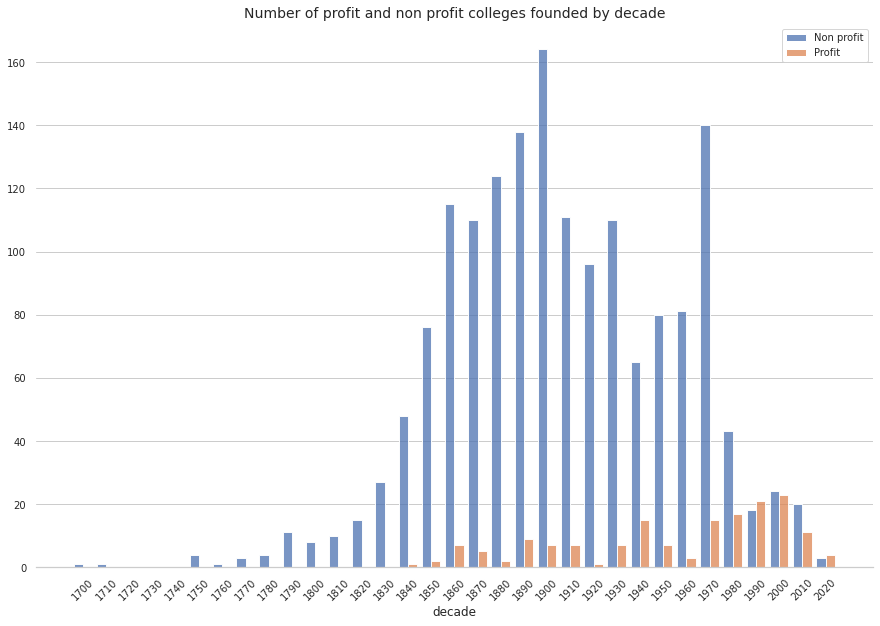

In [15]:
plt.figure(figsize=fig_size)
g = sns.histplot(data=profits, x="decade", hue="for_profit", multiple="dodge", binwidth=10, binrange=bin_range_decade, edgecolor = 'w', shrink=0.8)

g.legend_.set_title(None)
plt.xticks(decade_range, rotation=45)
plt.ylabel('')
plt.title("Number of profit and non profit colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_3_decades.png", facecolor='white')  # ignore facecolor for a transparent background

#### Founded by year from 1950

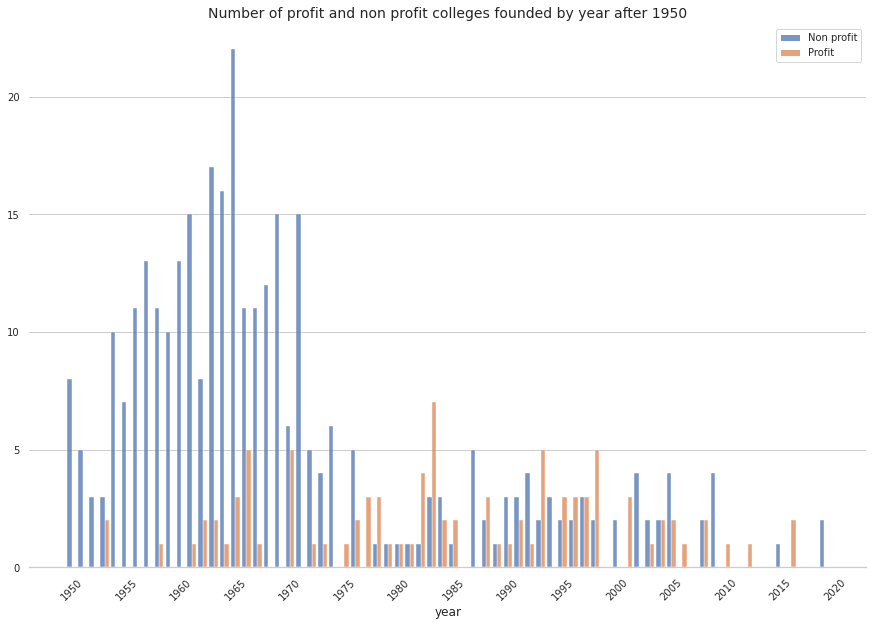

In [16]:
plt.figure(figsize=fig_size)
g = sns.histplot(data=profits_after_1950, x="year", hue="for_profit", multiple="dodge", binwidth=1, binrange=bin_range_year, edgecolor = 'w', shrink=0.8)

g.legend_.set_title(None)
plt.xticks(year_range, rotation=45)
plt.ylabel('')
plt.title("Number of profit and non profit colleges founded by year after 1950")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_3_years.png", facecolor='white')  # ignore facecolor for a transparent background_

### 4. Comparison religiously controlled, secular colleges

In [17]:
non_profit_colleges = colleges.copy()
non_profit_colleges = non_profit_colleges[(non_profit_colleges['control'] == "Private") & (non_profit_colleges['for_profit'] == 0)]
non_profit_colleges['religious_controlled'] = non_profit_colleges['religious_controlled'].astype(str)
non_profit_colleges['religious_controlled'] = non_profit_colleges['religious_controlled'].str.replace('0', 'Secular')
non_profit_colleges['religious_controlled'] = non_profit_colleges['religious_controlled'].str.replace('1', 'Religiously')
non_profits_after_1950 = non_profit_colleges[non_profit_colleges['year'] >= 1950]
print(f"Number of colleges: {len(non_profit_colleges)}")
print(f"Number founded after 1950: {len(non_profits_after_1950)}")

Number of colleges: 1083
Number founded after 1950: 193


#### Founded by decade

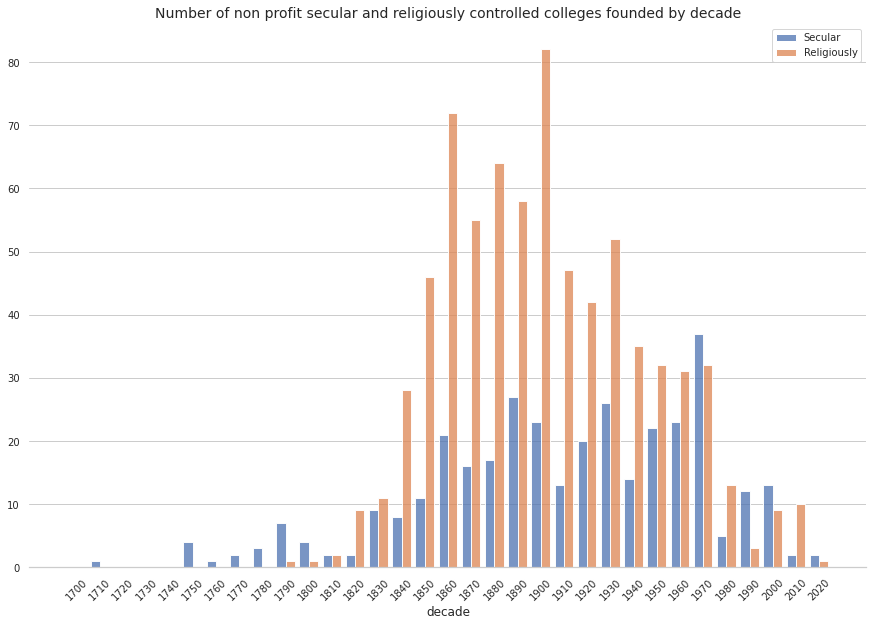

In [18]:
plt.figure(figsize=fig_size)
g = sns.histplot(data=non_profit_colleges, x="decade", hue="religious_controlled", multiple="dodge", binwidth=10, binrange=bin_range_decade, edgecolor = 'w', shrink=0.8)

g.legend_.set_title(None)
plt.xticks(decade_range, rotation=45)
plt.ylabel('')
plt.title("Number of non profit secular and religiously controlled colleges founded by decade")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_4_decades.png", facecolor='white')  # ignore facecolor for a transparent background

#### Founded by year after 1950

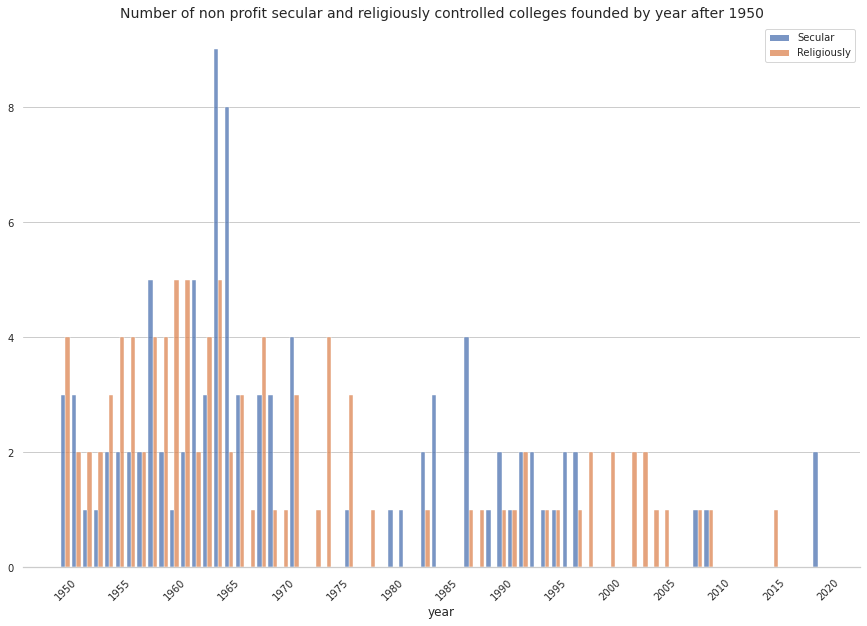

In [19]:
plt.figure(figsize=fig_size)
g = sns.histplot(data=non_profits_after_1950, x="year", hue="religious_controlled", multiple="dodge", binwidth=1, binrange=bin_range_year, edgecolor = 'w', shrink=0.8)

g.legend_.set_title(None)
plt.xticks(year_range, rotation=45)
plt.ylabel('')
plt.title("Number of non profit secular and religiously controlled colleges founded by year after 1950")
sns.despine(left=True)
plt.grid(axis='x')
# plt.savefig("plots/plot_4_year.png", facecolor='white')  # ignore facecolor for a transparent background